# Введение

В современном мире обработка текстов на естественных языках стала одним из ключевых направлений развития искусственного интеллекта. Машинное обучение играет важную роль в этой области, позволяя компьютерам работать с текстами на естественных языках. Все это дает возможность решить множество различных проблем. В данной работе рассмотрен пример решения задачи машинного обучения на примере классификации наличия кибербуллинга в постах в Интернете.

В настоящее время, время особо активного развития различных социальных сетей, проблема кибербуллинга стала как никогда актуальной. С ростом числа пользователей сети Интернет и увеличением времени, проведенного ими в виртуальном пространстве, возрастает и вероятность столкнуться с агрессивными или оскорбительными высказываниями. Чтобы сделать Интернет-среду наиболее здоровой и безопасной, необходимо очень тщательно модерировать все посты и сообщения социальных сетей. Из-за большого количества подобных комментариев, очень сложно проводить модерацию вручную. Поэтому для борьбы с этим явлением становится важным использование методов машинного обучения для автоматизированной проверки текстов на признаки кибербуллинга.

**Решаемая задача:** По содержанию твитов (постов социальной сети Twitter) определить какой тип кибербуллинга содержится в нем. Данная задача в машинном обучении относится к задачам классификации.

**Цель работы:** Исследование и применение методов машинного обучения в задаче обработки текста на естественных языках для выявления и классификации сообщений в сети Интернет, содержащих признаки кибербуллинга.

**Задачи:**

1. Сбор и анализ данных.

2. Предобработка текста.

3. Обучение моделей машинного обучения для классификации постов.

4. Выбор наилучшей модели на основе выбранной метрики эффективности и времени обучения.

5. Улучшение полученной модели.

# Основная часть 

## Загрузка библиотек

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# обработка данных
import re
import string
import demoji
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
# улучшение модели
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from yellowbrick.model_selection import LearningCurve
from sklearn.ensemble import BaggingClassifier
# метрики качества модели
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

## Загрузка и описание данных 

(№1 методических рекомендаций)

Для выполнения данного исследования был взят датасет с сайта  [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Авторами данного датасета являются три студента Jason Wang, Kaiqun Fu и Chang-Tien Lu, которые впервые представили его на  2020 IEEE International Conference on Big Data в своей научной работе$^1$. 

------
1. J. Wang, K. Fu and C. -T. Lu, "SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection," 2020 IEEE International Conference on Big Data (Big Data), Atlanta, GA, USA, 2020, pp. 1699-1708, doi: 10.1109/BigData50022.2020.9378065.


In [276]:
data = pd.read_csv('cyberbullying_tweets.csv')
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [277]:
data.shape

(47692, 2)

> Датасет содержит 2 столбца и 47692 строки.

**Столбцы:**

- tweet_text: текст поста пользователя социальной сети Twitter

- cyberbullying_type: класс, к которому относится кибербуллинг в посте

**Примеры строк из столбца 'tweet_text':**

In [278]:
print(data['tweet_text'].iloc[0])
print(data['tweet_text'].iloc[1])

In other words #katandandre, your food was crapilicious! #mkr
Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc


**Анализ столбца 'cyberbullying_type':**

In [279]:
list(data['cyberbullying_type'].unique())

['not_cyberbullying',
 'gender',
 'religion',
 'other_cyberbullying',
 'age',
 'ethnicity']

Данный столбец является целевой переменной. Он содержит следующие классы:

- religion (религия)

- age (возраст)

- gender (пол)

- ethnicity (этническая принадлежность)

- not_cyberbullying (кибербуллинга нет)

- other_cyberbullying (другой тип кибербуллинга)

## Предварительный анализ данных

(№2 и №11 (визуализация) методических рекоментациях)

**Основная статистическая информация:**

In [280]:
data.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [281]:
data.info() #название столбца, количество ненулевых значений, тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


> В обоих столбцах содержатся строковые данные.

**Дубликаты строк:**

In [282]:
duplicateRows = data[data.duplicated()]
dup_ind = duplicateRows.index
duplicateRows.head()

,tweet_text,cyberbullying_type
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
3833,But you all respect him....Pete hasn't read tw...,not_cyberbullying
3939,This is the opportunity to prove ourselves lik...,not_cyberbullying
5684,Strategicscoring should be classed as cheating...,not_cyberbullying
6975,"If we're at the bottom of the leaderboard, we'...",not_cyberbullying


In [283]:
data.drop(dup_ind, inplace = True)

> В датасете содержались дубликаты строк, которые были удалены.

**Анализ на наличие аномалий:**

На момент создания датасета, максимальная длина твита могла достигать только 280 символов. Проверим, все ли строки соответствуют данному условию.

In [284]:
anomaly = data[data['tweet_text'].str.len() > 280]
ind = anomaly.index
display(anomaly.shape)
anomaly.head()

(703, 2)

,tweet_text,cyberbullying_type
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying
3030,He embellished the afternoon with moustachioed...,not_cyberbullying
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying
7959,I always get fucking pissed when I see a man j...,gender
8043,I posted about a problematic drag queen that m...,gender


In [285]:
data.drop(ind, inplace = True)

> В датасете содержалось 702 твита длиной больше 280, поэтому, пометив их как аномальные, удалили их из датасета.

**Пропущенные значения:**

In [286]:
data.isnull().sum() 

tweet_text            0
cyberbullying_type    0
dtype: int64

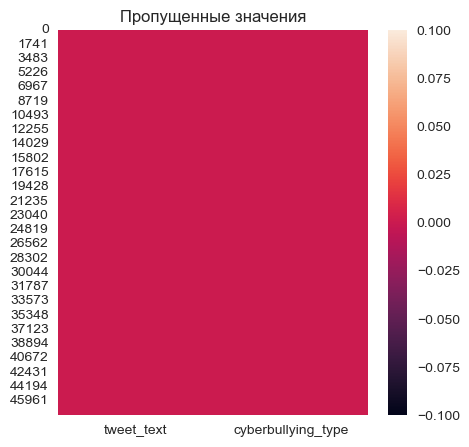

In [287]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(data.isnull())
ax.set(title = 'Пропущенные значения')
plt.show()

> В датасете нет пропущенных значений.

**Дисбаланс классов:**

In [288]:
data['cyberbullying_type'].value_counts()

cyberbullying_type
not_cyberbullying      7934
ethnicity              7862
gender                 7837
age                    7817
other_cyberbullying    7816
religion               7687
Name: count, dtype: int64

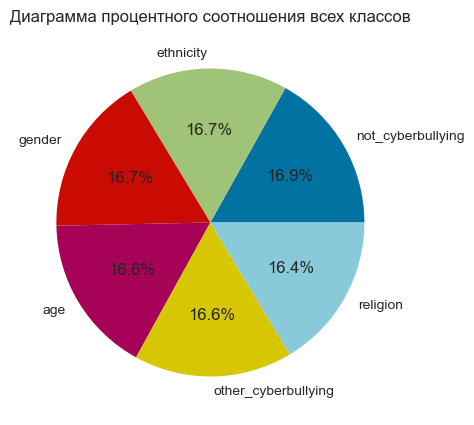

In [289]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(list(data['cyberbullying_type'].value_counts()), 
       labels=data['cyberbullying_type'].value_counts().index, 
       autopct='%1.1f%%'       )
ax.set(title = 'Диаграмма процентного соотношения всех классов')
plt.show()

> Диcбаланса классов нет.

In [290]:
data.shape

(46953, 2)

> После предобработки данных размер датасета составляет: 46953 строки и 2 столбца.

**Деление на признаки и целевую переменную:**

In [196]:
X = data[['tweet_text']]
X.head()

,tweet_text
0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...


In [197]:
y = data[['cyberbullying_type']]
y.head()

,cyberbullying_type
0,not_cyberbullying
1,not_cyberbullying
2,not_cyberbullying
3,not_cyberbullying
4,not_cyberbullying


Также необходимо привести целевую переменную к категориальному типу:

In [198]:
y = y.astype('category')
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46953 entries, 0 to 47691
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cyberbullying_type  46953 non-null  category
dtypes: category(1)
memory usage: 412.9 KB


## Обработка естественного языка и векторизация 

(№3 методических рекомендаций)

**Приведение к единому регистру:**

In [199]:
def make_lower(text):
    return text.str.lower()

**Удаление emoji:**

In [200]:
def remove_emoji(text):
    return pd.Series([demoji.replace(text_i, '') for text_i in text])

**Удаление знаков пунктуации:**

К знакам пунктуации относятся: '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'

In [201]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

**Удаление ссылок:**

In [202]:
def remove_url(text):   
    return re.compile('https?://\S+|www\.\S+').sub('', text)

**Удаление стоп-слов:**

Стоп-слова представляют собой распространенные слова в языке, которые часто не несут глубокого смысла. Избавление от них помогает уменьшить объем текста для анализа и сфокусироваться на более важных словах, что улучшает точность и эффективность обработки текста.

К стоп-словам относятся местоимения (например: i, me, my, myself), артикли (a, an, the), предлоги (in, out, on, off) и т.д.

In [203]:
def remove_stopwords(text):
    sw = stopwords.words('english')
    filtered_text = []
    for word in text.split():
        if word not in sw:
            filtered_text.append(word)
    return ' '.join(filtered_text)

**Лемматизация:**

Лемматизация представляет собой процесс приведения слова к его нормальной, или словарной, форме, которая называется леммой.

In [204]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in text.split():
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma) 
    return ' '.join(lemmas)

Теперь применим все функции к X.

In [205]:
def text_preprocessing(X):
    X = make_lower(X)
    X = remove_emoji(X)
    X = X.apply(remove_url)
    X = X.apply(remove_punctuation)
    X = X.apply(remove_stopwords)
    X = X.apply(lemmatize_text)
    return X

X_pp = text_preprocessing(X['tweet_text'])

In [206]:
X = pd.DataFrame(X_pp, columns = ['tweet_text'])
X.head()

,tweet_text
0,word katandandre food crapilicious mkr
1,aussietv white mkr theblock imacelebrityau tod...
2,xochitlsuckkks classy whore red velvet cupcake
3,jasongio meh p thanks head concerned another a...
4,rudhoeenglish isi account pretending kurdish a...


In [207]:
print(X['tweet_text'].iloc[0])
print(X['tweet_text'].iloc[1])

word katandandre food crapilicious mkr
aussietv white mkr theblock imacelebrityau today sunrise studio10 neighbour wonderlandten etc


### Векторизация:

Векторизация – преобразование входных данных из их исходного формата в векторы действительных чисел, которые понятны моделям машинного обучения.

**TfidfVectorizer**

Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных методов векторизации текстовых данных. Данный метод помогает найти ключевые слова и определить, какие слова имеют наибольшую значимость для текста в контексте всего набора текстов.

TF (Term Frequency) - частота термина, которая обозначает, насколько часто определенное слово появляется в данном тексте. 

IDF (Inverse Document Frequency) - обратная частота документа, которая измеряет, насколько уникальным слово является во всем наборе текстов. 

**Формула вычисления TF-IDF**

$$ TF-IDF(t, d) = TF(t, d) \cdot IDF(t), $$

где 

- $TF(t, d)$ - частота термина для слова t в тексте d; 

- $IDF(t)$ - обратная частота документа для слова t.

**Пример работы векторизатора:**

In [208]:
vect = TfidfVectorizer()
X_vect = vect.fit_transform(X['tweet_text'].values)
X_vect

<46953x57128 sparse matrix of type '<class 'numpy.float64'>'
	with 594497 stored elements in Compressed Sparse Row format>

In [209]:
X_vect[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [210]:
pd.DataFrame(X_vect[0].todense()).T.value_counts()

0       
0.000000    57123
0.237473        1
0.303183        1
0.408353        1
0.491760        1
0.665662        1
Name: count, dtype: int64

В дальнейшем векторизация будет применяться с помощью Pipeline.

## Описательный анализ 

(№4 и №11 (визуализация) методических рекомендаций) 

In [211]:
data['length'] = data['tweet_text'].str.len()
data.head()

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103


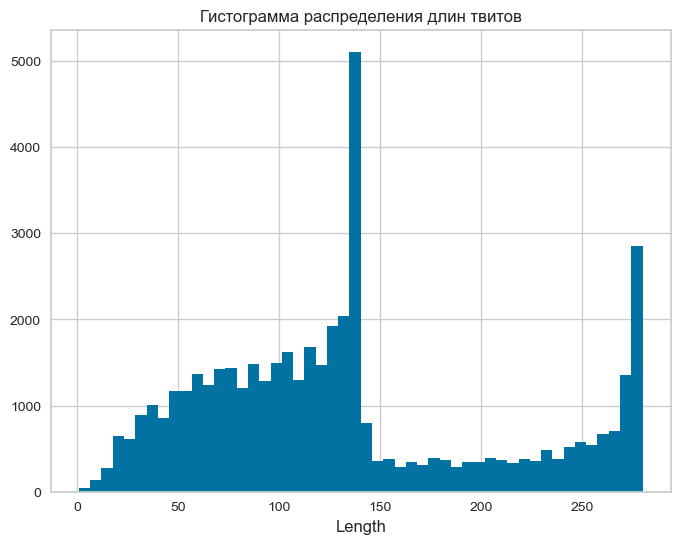

In [212]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist(data['length'], bins = 50)
ax.set(title = 'Гистограмма распределения длин твитов', xlabel = 'Length')
plt.show()

> Больше всего твитов имеют длину примерно 140 символов.

In [213]:
data['mean_word_length'] = data['tweet_text'].map(lambda tw: np.mean([len(word) for word in tw.split()]))
data.head()

,tweet_text,cyberbullying_type,length,mean_word_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,5.888889
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,7.285714
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,5.777778
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,4.722222
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,4.722222


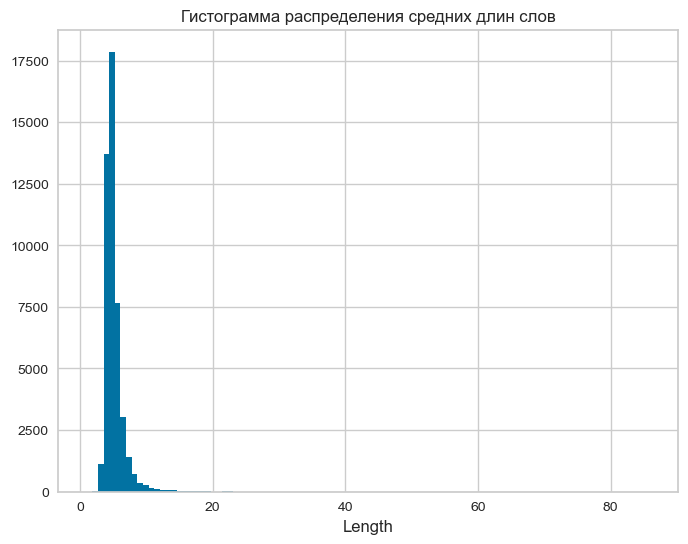

In [214]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist(data['mean_word_length'], bins = 100)
ax.set(title = 'Гистограмма распределения средних длин слов', xlabel = 'Length')
plt.show()

> Больще всего твитов имеют среднюю длину слова примерно 5 символов.

Рассмотрим самые часто встречающиеся слова в датасете:

In [215]:
corpus = []
for tweet in X['tweet_text'].values:
    corpus += tweet.split()

In [216]:
most_common = pd.DataFrame(Counter(corpus).most_common(10))

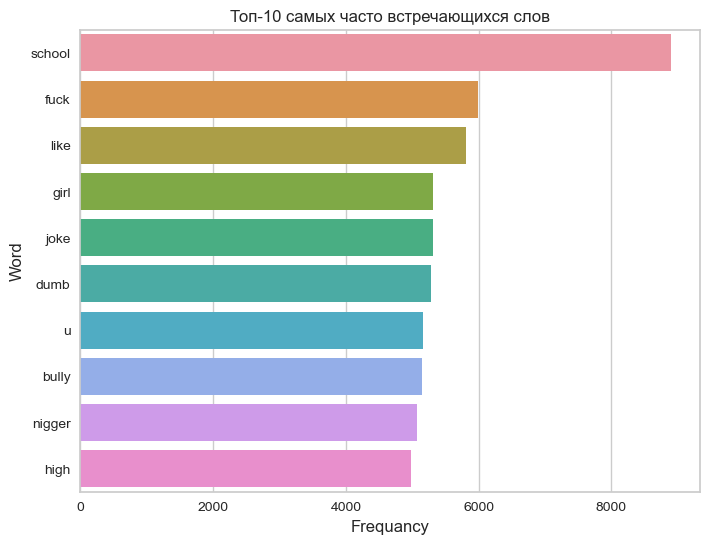

In [217]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x = most_common.iloc[:, 1], y = most_common.iloc[:, 0])
ax.set(title = 'Топ-10 самых часто встречающихся слов', xlabel = 'Frequancy', ylabel = 'Word')
plt.show()

## Деление данных 

(№6 методических рекомендаций)

Разделим выборку случайным образом в соотношении 80%/20%, где 80% строк выделяется для тренировочной выборки, а 20% - для тестовой.

В данном случае хорошо подходит именно случайное разделение, потому что данные достаточно однородны, нет дисбаланса классов и отсутствует временная структура.

In [218]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 52)

**Количество элементов каждого из классов в обучающей и тестовой выборках:**

In [219]:
p = list(np.unique(y_train, return_counts=True))
p.append(np.unique(y_test, return_counts=True)[1])
pd.DataFrame(np.array(p).T, columns = ['cyberbullying_type', 'train', 'test'])

,cyberbullying_type,train,test
0,age,6322,1495
1,ethnicity,6252,1610
2,gender,6232,1605
3,not_cyberbullying,6370,1564
4,other_cyberbullying,6250,1566
5,religion,6136,1551


## Метрики качества модели 

Для оценки качества модели классификации применяют следующие метрики:

1. Матрица ошибок (Сonfusion matrix) - матрица, которая отображает количество правильно и неправильно распознанных объектов каждого класса. Дает наглядно понять, как хорошо работает модель.

2. Меткость (Accuracy) - доля правильно предсказанных классов. Характеризует качество модели, но зачастую используется в сочетании с другими метриками. Данная метрика часто используется в задачах классификации, когда все классы равноправны и одинаково важны, и нет явного дисбаланса классов.

3. Точность (Precision) -это метрика оценки качества модели в задачах классификации, которая измеряет долю правильно предсказанных положительных классов относительно всех объектов, которые модель предсказала как положительные. Эта метрика особенно полезна в случаях, когда наблюдается дисбаланс в количестве объектов различных классов.

4. Полнота (Recall) -  это отношение количества правильно определенных положительных объектов к общему числу действительно положительных объектов. Наиболее часто используеься когда присутствует дисбаланс классов.

5. F1-мера (F1-score) - взвешенное гармоническое среднее полноты и точности. 

6. Площадь под ROC-кривой (Area under ROC-curve, AUC-ROC) - это метрика оценивает баланс между частотой истинных и ложных положительных результатов при различных пороговых значениях классификации.

7. Площадь под кривой полнота-точность (Area under precision-recall curve, AUC-PR) - это метрика предоставляет всестороннюю оценку работы модели на различных уровнях точности и полноты при различных порогах классификации. Используется, когда необходимо оценить эффективность модели классификации при различных компромиссах между precision и recall и выбрать оптимальное значение порога. Он особенно полезен, когда есть дисбаланс классов.


Так как в датасете отсутствует дисбаланс классов, а также нет четкого приоритета классов, наиболее подходящей метрикой для оценки качества модели будет меткость (accuracy). На ее основе будет проводиться выбор модели. Остальные метрики будут вспомогательными, для более точного определения эффективности модели.

## Обучение моделей 

(№7 и №11 (визуализация) методических рекомендаций)

Проведу сравнение нескольких моделей с помощь кросс-валидации. Для сравнения буду использовать следующие модели: 

1. Логистическая регрессия (LogisticRegression);

2. Классификатор k ближайших соседей (KNeighborsClassifier);

3. Мультиномиальный Наивный Байес (MultinomialNB); 

4. Метод опорных векторов без ядра (SVC(kernel = "linear")); 

5. Метод опорных векторов с гауссовским ядром (SVC(kernel = "rbf")); 

6. Случайный лес (RandomForestClassifier);

7. Градиентный бустинг (GradientBoostingClassifier); 

8. Стохастический градиентный спуск (SGDClassifier);.

In [220]:
classifiers = {"Logistic Regression": LogisticRegression(max_iter = 1000),
               "KNN": KNeighborsClassifier(),
               "Multinomial Naive Bayes": MultinomialNB(),
               "Linear SVM": SVC(kernel = "linear"),
               "RBF SVM": SVC(kernel = "rbf"),
               "Random Forest": RandomForestClassifier(),
               "Gradient Boosting": GradientBoostingClassifier(),
               "SGD": SGDClassifier()}

In [221]:
X_train_1 = X_train['tweet_text'].values
y_train_1 = y_train['cyberbullying_type'].values

In [222]:
scores = {}
for name, clf in list(classifiers.items()):
    model = Pipeline([('tfidf', TfidfVectorizer()), (name, clf)])
    cv_results = cross_validate(model, 
                                X_train_1, y_train_1, 
                                cv = 5, 
                                scoring = 'accuracy',
                                return_train_score = True)
    scores[name] = [cv_results['test_score'].mean(), 
                    cv_results['train_score'].mean(), 
                    cv_results['fit_time'].mean()]

In [223]:
df = pd.DataFrame(scores, index = ['test_score', 'train_score', 'fit_time']).T
df.sort_values(by = ['test_score'], ascending = False, inplace = True)
df

,test_score,train_score,fit_time
Linear SVM,0.834913,0.936066,39.012356
SGD,0.831638,0.906135,0.515078
RBF SVM,0.827885,0.962242,78.920629
Gradient Boosting,0.827459,0.842953,108.820924
Logistic Regression,0.825808,0.914016,8.160660
Random Forest,0.825116,0.977078,235.589081
Multinomial Naive Bayes,0.759065,0.863526,0.448621
KNN,0.249853,0.247644,0.442107


Для выбора наилучшей модели рассмотрим зависимость целевой метрики качества от времени обучения.

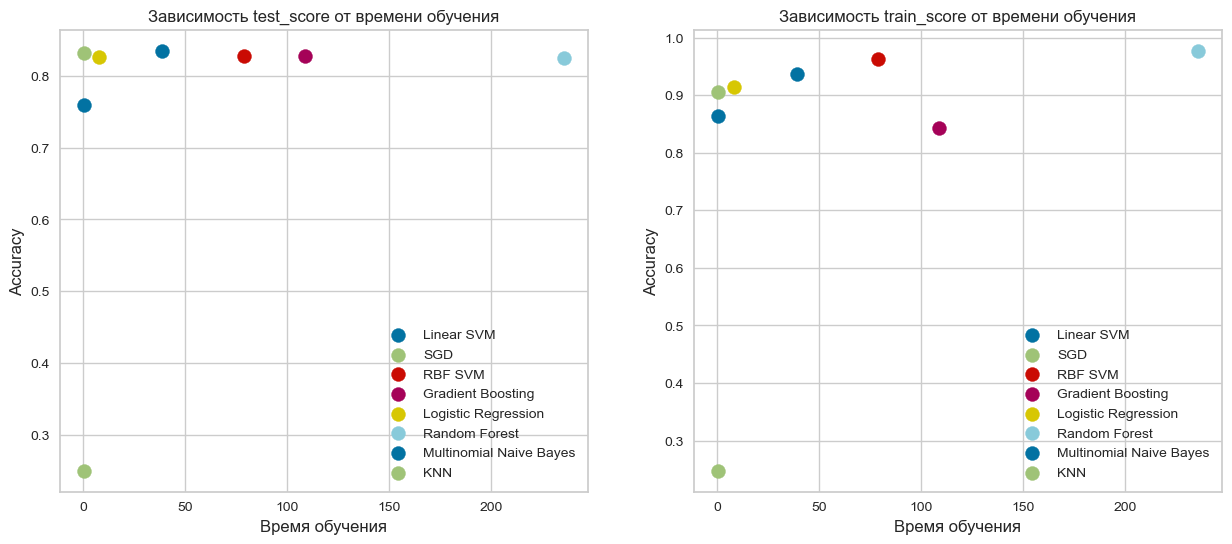

In [224]:
scatter_y = df.test_score.values
scatter_y_1 = df.train_score.values
scatter_x = df.fit_time.values
labels = df.index

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
for i, l in enumerate(labels):
    ax[0].scatter(scatter_x[i], scatter_y[i], label = l, s = 100)

    ax[0].set(title = 'Зависимость test_score от времени обучения', 
           xlabel = 'Время обучения',
           ylabel = 'Accuracy')
    
    ax[1].scatter(scatter_x[i], scatter_y_1[i], label = l, s = 100)

    ax[1].set(title = 'Зависимость train_score от времени обучения', 
           xlabel = 'Время обучения',
           ylabel = 'Accuracy')
    
    ax[1].legend()
    ax[0].legend()
    
plt.show()

> В результате кросс-валидации и оценки графиков получили, что модель Linear SVM имеет самую высокую метрику accuracy, но, одновременно с этим, она относительно долго обучается. Именно поэтому будет целесообразно использовать SGDClassifier, или стохастический градиентный спуск, так как он является оптимизатором для семейства линейных моделей и при гиперпараметрах по умолчанию выполняет ту же задачу оптимизации, что и Linear SVM, но быстрее.

## Подбор гиперпараметров и улучшение модели

(№8, №9 и №11 (визуализация) методических рекомендаций)

SGDClassifier (стохастический градиентный спуск для классификации) — это модель машинного обучения, которая использует метод стохастического градиентного спуска для обучения линейных моделей классификации. SGD успешно применяется для решения крупномасштабных и разреженных задач машинного обучения, часто встречающихся при классификации текста и обработке естественного языка.

Принцип работы:

1. В начале процесса обучения инициализируются параметры модели, такие как веса и смещение (bias). Обычно они выбираются случайным образом или используются нулевые значения.

2. На каждой итерации обучения выбирается случайный образец из обучающего набора данных.

3. Для выбранного образца вычисляется градиент функции потерь по отношению к параметрам модели. Это показывает направление, в котором нужно изменить параметры модели, чтобы уменьшить функцию потерь.

4. После вычисления градиента происходит обновление параметров модели в направлении, противоположном градиенту, с учетом скорости обучения (learning rate). Это шаг оптимизации, который позволяет приблизиться к оптимальным значениям параметров.

5. Данный процесс повторяется для каждого образца в обучающем наборе данных или до тех пор, пока не будет достигнуто условие остановки (например, заданное количество итераций или достижение определенного уровня точности).

SGDClassifier хорошо подходит для больших наборов данных, так как он работает по одному случайному образцу за раз, что позволяет эффективно обучать модель даже на больших объемах данных. Он также может использоваться с различными функциями потерь.

### Диагностика модели:

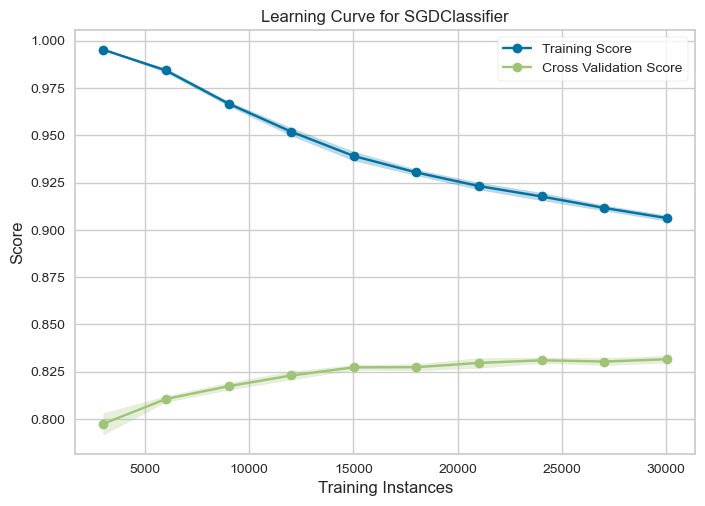

In [225]:
model = Pipeline([('tfidf', TfidfVectorizer()), ('sgd', SGDClassifier())])
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X_train_1, y_train_1).show() 

> Кривая обучения показала, что имеет место переобучение.

### Подбор гиперпараметров и регуляризация:

**Гиперпараметры TfidfVectorizer:**

- **max_df** (float or int), по умолчанию = 1.0

   При составлении словаря игнорирует термины, частота использования которых в документах строго превышает заданный порог (стоп-слова, относящиеся к конкретному корпусу). Если значение float находится в диапазоне [0.0, 1.0], параметр представляет долю документов, целое абсолютное число.
   
- **min_df** (float or int), по умолчанию = 1

   При составлении словаря игнорирует термины, частота использования которых в документах строго ниже заданного порогового значения. В литературе это значение также называется пороговым значением. Если значение float находится в диапазоне [0.0, 1.0], параметр представляет долю документов, целое абсолютное число.
   
- **norm** {‘l1’, ‘l2’} or None, по умолчанию = ’l2’

   Каждая выходная строка будет иметь единичную норму, либо:

  ‘l2’: Сумма квадратов элементов вектора равна 1. Косинусное сходство между двумя векторами является их скалярным произведением, когда была применена норма l2.

  ‘l1’: Сумма абсолютных значений элементов вектора равна 1.

  None: Нормализация отсутствует.

- **ngram_range** (tuple) (min_n, max_n), по умолчанию = (1, 1)

    Нижняя и верхняя границы диапазона n-значений для различных n-граммов, которые необходимо извлечь. Будут использоваться все значения n, такие, что min_n <= n <= max_n. Например, значение ngram_range, равное (1, 1), означает только униграммы, (1, 2) означает униграммы и биграммы, а (2, 2) означает только биграммы. Применяется только в том случае, если анализатор недоступен для вызова.


**Гиперпараметры SGDClassifier():**


- **loss** {‘hinge’, ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’}, по умолчанию = ’hinge’
    
    Какую функцию потерь использовать:

  ‘hinge’ дает linear SVM.

  ‘log_loss’ дает логистическую регрессию.

  ‘modified_huber’ обеспечивает устойчивость к выбросам, а также оценку вероятности.

  ‘squared_hinge’ похожа на hinge, но имеет квадратичный штраф.

  ‘perceptron’ это линейная функция потерь, используется в алгоритмах перцептрона.


- **penalty** {‘l2’, ‘l1’, ‘elasticnet’, None}, по умолчанию = ’l2’

    Используемый штраф (термин регуляризации). По умолчанию используется значение ‘l2’, которое является стандартным регуляризатором для линейных SVM-моделей. "l1" и "elasticnet" могут привести к разреженности модели (выбору функций), недостижимой при использовании "l2". Штраф не начисляется, если установлено значение "Нет".

- **alpha** (float), по умолчанию = 0.0001

    Константа, умножающая коэффициент регуляризации. Чем выше значение, тем сильнее регуляризация. Также используется для вычисления скорости обучения, если для параметра learning_rate установлено значение ‘оптимальный’. Значения должны находиться в диапазоне [0.0, inf).

- **l1_ratio** (float), по умолчанию = 0.15

    Параметр смешивания Elastic Net, где 0 <= l1_ratio <= 1. l1_ratio=0 соответствует штрафу L2, l1_ratio=1 - L1. Используется только в том случае, если штрафом является ‘elasticnet’. Значения должны находиться в диапазоне [0.0, 1.0].


- **fit_intercept** (bool), по умолчанию = True

    Следует ли оценивать intercept или нет. Если значение равно False, предполагается, что данные уже отцентрированы.


- **max_iter** (int), по умолчанию = 1000

    Максимальное количество проходов по обучающим данным (epochs). Значения должны быть в диапазоне [1, inf).


- **tol** (float or None), по умолчанию = 1e-3

    Критерий остановки. Если он не равен None, то обучение будет остановлено, когда (loss > best_loss - tol) для n_iter_no_change последовательных периодов. Сходимость проверяется на потери при обучении или при проверке, в зависимости от параметра early_stopping. Значения должны находиться в диапазоне [0.0, inf).


- **learning_rate** (str), по умолчанию = ’optimal’

    График темпов обучения:

  ‘constant’: eta = eta0

  ‘optimal’: eta = 1.0 / (alpha * (t + t0)), где t0 выбирается с помощью эвристики, предложенной Леоном Ботту.

  invscaling’: eta = eta0 / pow(t, power_t)

  ‘adaptive’: eta = eta0, при условии, что время обучения продолжает сокращаться. Каждый раз, когда в течение последовательных периодов n_iter_no_change не удается уменьшить потери при обучении на tol или увеличить validation score на tol, если значение early_stopping равно True, текущая learning_rate делится на 5.


- **eta0** (float), по умолчанию = 0.0

    Начальная скорость обучения для "constant", "invscaling" или "adaptive". Значение по умолчанию равно 0.0, поскольку eta0 не используется по умолчанию в "optimal". Значения должны находиться в диапазоне [0.0, inf).




> При подборе гиперпараметров будем использовать ngram_range для TfidfVectorizer и loss, penalty, alpha, max_iter для SGDClassifier.

In [226]:
model = Pipeline([('tfidf', TfidfVectorizer()), ('sgd', SGDClassifier())])

params = {'tfidf__ngram_range': [(1, 1), (1, 2)],
         'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'perceptron'],
         'sgd__penalty': ['l2', 'l1', 'elasticnet', None],
         'sgd__alpha': [0.0001, 0.01, 1, 10],
         'sgd__max_iter': [500, 1000, 5000]}

grid_model = GridSearchCV(estimator = model,
                          param_grid = params,
                          scoring = 'accuracy',
                          cv = 5,
                          return_train_score = True)

grid_model.fit(X_train_1, y_train_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('sgd', SGDClassifier())]),
             param_grid={'sgd__alpha': [0.0001, 0.01, 1, 10],
                         'sgd__loss': ['hinge', 'log_loss', 'modified_huber',
                                       'perceptron'],
                         'sgd__max_iter': [500, 1000, 5000],
                         'sgd__penalty': ['l2', 'l1', 'elasticnet', None],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             return_train_score=True, scoring='accuracy')

In [227]:
info = pd.DataFrame(grid_model.cv_results_)[['params', 
                                            'mean_test_score', 
                                            'mean_train_score',
                                            'mean_fit_time',
                                            'rank_test_score']]
info.sort_values(by = ['rank_test_score'], ascending = True, inplace = True)
info.head()

,params,mean_test_score,mean_train_score,mean_fit_time,rank_test_score
8,"{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', '...",0.832011,0.906275,0.514253,1
0,"{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', '...",0.831878,0.906155,0.508133,2
16,"{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', '...",0.831212,0.906022,0.514618,3
60,"{'sgd__alpha': 0.0001, 'sgd__loss': 'modified_...",0.829828,0.925976,0.783699,4
12,"{'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', '...",0.829668,0.868078,0.645100,5


In [292]:
best_params = dict(info.loc[8].params)
pd.DataFrame(best_params.values(), index = best_params.keys(), columns = ['Лучшие параметры'])

,Лучшие параметры
sgd__alpha,0.0001
sgd__loss,hinge
sgd__max_iter,1000
sgd__penalty,l2
tfidf__ngram_range,"(1, 1)"


In [232]:
print(f'Среднее значение метрики по кросс-валидации: {info.loc[8].mean_test_score:.4f}')
print(f'Среднее время обучения по кросс-валидации: {info.loc[8].mean_fit_time:.4f}')

Среднее значение метрики по кросс-валидации: 0.8320
Среднее время обучения по кросс-валидации: 0.5143


> В результате подбора гиперпараметров получили следующую модель: `Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1, 1)), ('sgd', SGDClassifier(alpha = 0.0001, loss = 'hinge', max_iter = 1000, penalty = 'l2'))])`

**Ансамблирование модели:**

Ансамблирование моделей в машинном обучении — это методика, при которой комбинируются результаты нескольких моделей для достижения лучшего прогнозирования, чем могли бы дать отдельно взятые модели. Один из популярных методов ансамблирования — это бэггинг (bagging).

Bagging (Bootstrap Aggregating) — это техника ансамблирования, при которой создается несколько подвыборок данных путем случайного выбора с заменой из обучающего набора. Затем на каждой подвыборке обучается отдельная модель, их прогнозы комбинируются в результате голосования или усреднения.

Bagging помогает уменьшить переобучение и повысить стабильность модели за счет усреднения шума, присутствующего в данных. Он особенно эффективен для моделей, склонных к переобучению.

In [264]:
vect = TfidfVectorizer()
X_vect_train = vect.fit_transform(X_train_1)

ensemble_model = BaggingClassifier(estimator = SGDClassifier(max_iter=1000),
                                   random_state=52)

cv_ensemble = cross_validate(ensemble_model, 
                            X_vect_train, y_train_1, 
                            cv = 5, 
                            scoring = 'accuracy',
                            return_train_score = True)

In [265]:
cv_df = pd.DataFrame(cv_ensemble)
cv_df

,fit_time,score_time,test_score,train_score
0,1.373253,0.058257,0.830427,0.902359
1,1.405417,0.062430,0.835884,0.901594
2,1.479838,0.054924,0.835330,0.901597
3,1.354191,0.066512,0.833866,0.901597
4,1.511815,0.060014,0.834931,0.903195


In [266]:
print(f'Среднее значение метрики по кросс-валидации: {cv_df.test_score.mean():.4f}')
print(f'Среднее время обучения по кросс-валидации: {cv_df.fit_time.mean():.4f}')

Среднее значение метрики по кросс-валидации: 0.8341
Среднее время обучения по кросс-валидации: 1.4249


> В результате ансамблирования модели, получили, что целевая метрика стала больше первоначальной всего на 0.002. Поэтому использование ансамблирование не целесообразно.

### Метрики качества модели:

In [267]:
best_model = grid_model.best_estimator_.fit(X_train_1, y_train_1)

In [268]:
X_test_1 = X_test['tweet_text'].values
y_test_1 = y_test['cyberbullying_type'].values

In [269]:
y_pred = best_model.predict(X_test_1)

acc = accuracy_score(y_test_1, y_pred)
pr = precision_score(y_test_1, y_pred, average = 'macro')
rc = recall_score(y_test_1, y_pred, average = 'macro')
f1 = f1_score(y_test_1, y_pred, average = 'macro')

metrics = pd.DataFrame({'SGD': [acc, pr, rc, f1]}, 
                        index = ['Accuracy', 'Precision', 'Recall', 'F1'])
metrics

,SGD
Accuracy,0.826323
Precision,0.821346
Recall,0.826884
F1,0.819762


Построим матрицу ошибок для лучшего понимания того, какие классы модель предсказывает правильно:

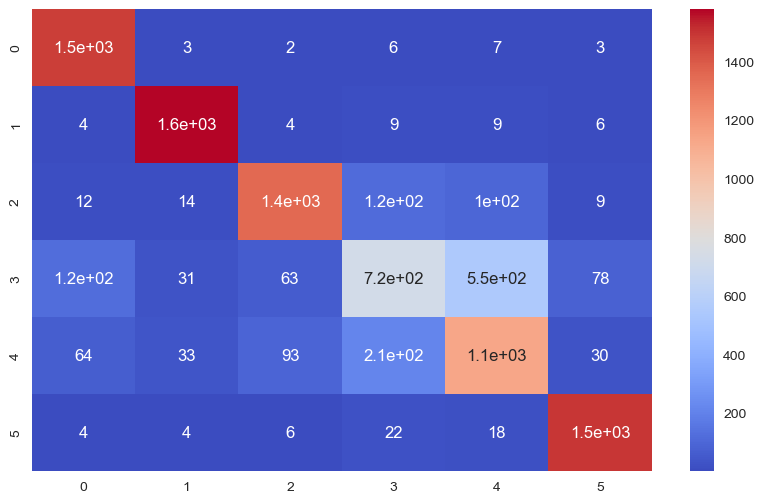

In [271]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test_1, y_pred), cmap="coolwarm", annot = True)
plt.show()

> По матрице ошибок видим, что количество ошибок очень мало по отношению ко всей выборке. Но один из классов (other_cyberbullying) предсказывается хуже остальных.

Проанализируем кривые ROC-AUC и PR-AUC:

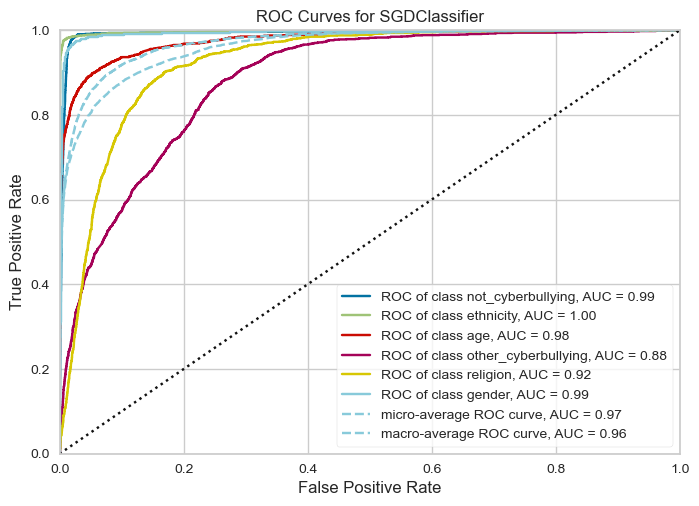

<Axes: title={'center': 'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [273]:
cls = pd.unique(y_train_1)
visualizer_roc = ROCAUC(best_model, classes = cls)
visualizer_roc.fit(X_train_1, y_train_1)
visualizer_roc.score(X_test_1, y_test_1)
visualizer_roc.show()

На графике ROC кривых представленны кривые и метрики для каждого из шести классов. Так как данный показатель применим только к бинарной классификации, алгоритм рассчитывает метрики для каждого класса, обозначая нужный класс за 0, а остальные за 1, тем самым приводя к бинарной классификации.

> Показатель AUC−ROC является мерой качества классификатора относительно идеального. Значение показателя в пределах [0.8, 1] говорит об очень хорошем качестве модели.

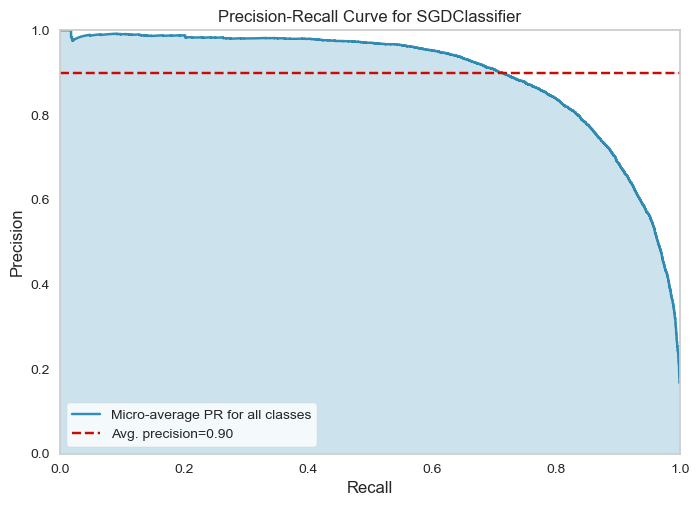

<Axes: title={'center': 'Precision-Recall Curve for SGDClassifier'}, xlabel='Recall', ylabel='Precision'>

In [274]:
visualizer_pr = PrecisionRecallCurve(best_model, classes = cls)
visualizer_pr.fit(X_train_1, y_train_1)
visualizer_pr.score(X_test_1, y_test_1)
visualizer_pr.show()

PR-AUC - метрика, отражает качество классификатора и позволяет сравнивать кривые, соответствующие различным балансам классов и значениям порога. Чем выше площадь, тем лучше работает модель. 

> В данном случае метрика равна 0.9, что говорит о хорошем качестве модели.

# Заключение

В результате проведенного исследования с помощью методов машинного обучения для обработки текста на естественных языках удалось получить модель машинного обучения для задачи классификации. Метрика качества accuracy полученной модели составляет 83%.

Машинное обучение играет ключевую роль в решении задач обработки текста на естественных языках, включая выявление кибербуллинга в социальных медиа. Модель, разработанная в данной работе, позволяет определить наличие киббербуллинга, а также его тип. Такая модель может быть использована, например, при создании ботов, которые бы автоматически удаляли агрессивные комментарии.

Таким образом, можно сказать, что исследование, проведенное в данной работе, имеет большой потенциал и может быть использовано на благо общества.
